<a href="https://colab.research.google.com/github/taufiksatrian/Klasifikasi_Pencemaran_Udara_Backpropagation/blob/main/Klasifikasi_Pencemaran_Udara_Backpropragation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import itertools
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Pengumpulan Data

In [ ]:
data = pd.read_csv("datasetPreprocessing.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace = True) 
data.head()

,pm10,pm25,so2,co,o3,no2,categori
0,0.140244,0.248447,0.3375,0.097561,0.160839,0.161290,1
1,0.073171,0.204969,0.3125,0.121951,0.272727,0.064516,2
2,0.176829,0.279503,0.2875,0.121951,0.223776,0.161290,1
3,0.091463,0.217391,0.2750,0.048780,0.167832,0.064516,2
4,0.140244,0.248447,0.2750,0.097561,0.160839,0.096774,1


In [ ]:
class_names = ['Tidak Sehat', 'Sedang', 'Sehat']

Split Data (Data Training dan Data Testing)

In [ ]:
#Membagi input dan output
x = data.iloc[:,0:6].values
y = data.iloc[:,-1].values

In [ ]:
x[0]

array([0.1402439 , 0.2484472 , 0.3375    , 0.09756098, 0.16083916,
       0.16129032])

In [ ]:
y[0]

1

In [ ]:
#Split Data (Data Training dan Data Testing)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape 

((1213, 6), (304, 6), (1213,), (304,))

In [ ]:
xtrain[0]

array([0.23170732, 0.47826087, 0.45      , 0.14634146, 0.09090909,
       0.25806452])

In [ ]:
ytrain[0]

1

Membangun Model BackPropagation 

In [ ]:
#Model Backpropagation
model = tf.keras.models.Sequential() #Membuat model arsitektur

model.add(tf.keras.layers.Dense(units=6, activation='relu')) #Input
model.add(tf.keras.layers.Dense(units=28, activation='relu')) #Hidden Layer
model.add(tf.keras.layers.Dense(units=3, activation='softmax')) #Output

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(xtrain,ytrain, epochs=100, batch_size=128, verbose=1, validation_data=(xtest,ytest)) 
model.evaluate(xtest, ytest, batch_size=128) 

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 1.0832 - accuracy: 0.5309 - val_loss: 1.0347 - val_accuracy: 0.7664
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0128 - accuracy: 0.7535 - val_loss: 0.9814 - val_accuracy: 0.7664
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9651 - accuracy: 0.7535 - val_loss: 0.9349 - val_accuracy: 0.7664
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9216 - accuracy: 0.7535 - val_loss: 0.8919 - val_accuracy: 0.7664
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8813 - accuracy: 0.7535 - val_loss: 0.8503 - val_accuracy: 0.7664
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8433 - accuracy: 0.7535 - val_loss: 0.8139 - val_accuracy: 0.7664
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8099 - accuracy: 0.7535 - val_loss: 0.7799 - val_accuracy: 0.7664
Epoch 8/100


[0.1731252819299698, 0.9440789222717285]

In [ ]:
#Model Backpropagation
modal = tf.keras.models.Sequential() #Membuat model arsitektur

modal.add(tf.keras.layers.Dense(units=6, activation='relu')) #Input
modal.add(tf.keras.layers.Dense(units=28, activation='relu')) #Hidden Layer
modal.add(tf.keras.layers.Dense(units=3, activation='softmax')) #Output

modal.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hista = modal.fit(xtrain,ytrain, epochs=100, batch_size=128, validation_data=(xtest,ytest)) 
modal.evaluate(xtest, ytest, batch_size=128) 

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 1.1650 - accuracy: 0.0833 - val_loss: 1.1414 - val_accuracy: 0.0658
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1234 - accuracy: 0.0684 - val_loss: 1.1025 - val_accuracy: 0.1118
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0877 - accuracy: 0.3627 - val_loss: 1.0685 - val_accuracy: 0.7204
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0563 - accuracy: 0.7453 - val_loss: 1.0379 - val_accuracy: 0.7664
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0267 - accuracy: 0.7535 - val_loss: 1.0082 - val_accuracy: 0.7664
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9973 - accuracy: 0.7535 - val_loss: 0.9770 - val_accuracy: 0.7664
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9666 - accuracy: 0.7535 - val_loss: 0.9440 - val_accuracy: 0.7664
Epoch 8/100


[0.16541588306427002, 0.9572368264198303]

Pengujian / Evaluasi Model

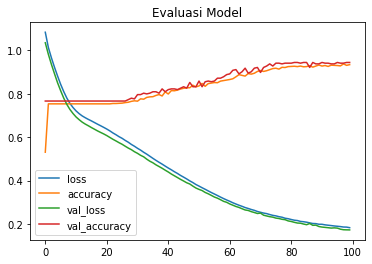

In [ ]:
pd.DataFrame(hist.history).plot(title="Evaluasi Model")

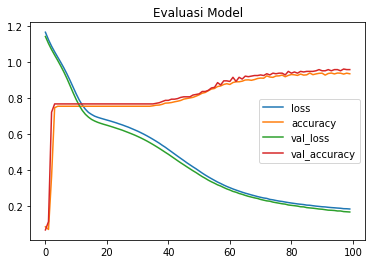

In [ ]:
pd.DataFrame(hista.history).plot(title="Evaluasi Model")

Text(0.5, 1.0, 'Accuracy evolution')

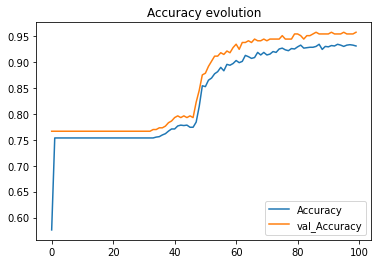

In [ ]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='val_Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy evolution')

Text(0.5, 1.0, 'Loss evolution')

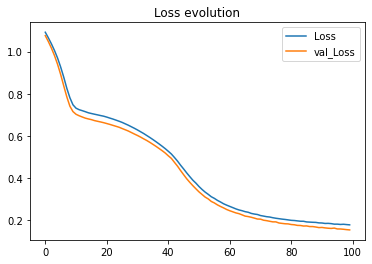

In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

In [ ]:
yprediksi = model.predict(xtest)

10/10 [==============================] - 0s 2ms/step


In [ ]:
yprediksi = yprediksi.argmax(axis=1)

In [ ]:
print("Predict Outputs:\n", yprediksi, end='\n\n')
print("Correct Outputs:\n", ytest, end='\n\n')

Predict Outputs:
 [0 1 0 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 2 1 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 2 1 2 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 2 1 1 0 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 0 1 2 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 2 1 2
 1 1 1 1 1 2 2 1]

Correct Outputs:
 [0 1 0 1 1 1 1 1 1 2 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1
 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 2 1 1 0 1 2 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 2 1 1 0 1 1 1 2 1 2 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 

In [ ]:
#Pengujian (Confusion Matrix)
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
#Pengujian (Confusion Matrix)
confusion_matrix(y_true=ytest, 
                 y_pred=yprediksi)

array([[ 40,  10,   0],
       [  1, 230,   2],
       [  0,   4,  17]])

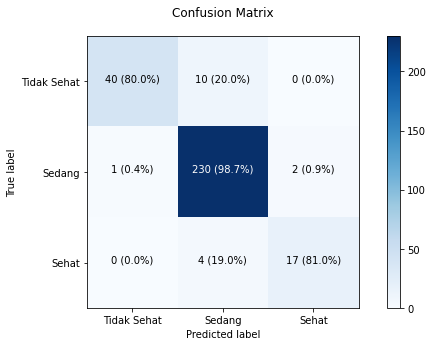

In [ ]:
#Pengujian (Confusion Matrix)
make_confusion_matrix(y_true=ytest, 
                      y_pred=yprediksi,
                      classes=class_names,
                      figsize=(10, 5),
                      text_size=10)

### **Save and Load Your Model**

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# save the model from file
model.save('backpropagation.h5')

In [ ]:
from tensorflow.keras.models import load_model

# load the model from file
model = load_model('model.h5')